In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
from matplotlib.pyplot import figure

In [69]:
movie_df = pd.read_csv("../Movie_analysis/Dataset/movies.csv")

In [70]:
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Check for null values if any and remove them

In [71]:
movie_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [72]:
movie_df.shape

(7668, 15)

In [73]:
movie_df = movie_df.dropna()

In [74]:
movie_df.shape

(5421, 15)

In [75]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


### Change datatype of columns(Gross,Budget)

In [76]:
movie_df["budget"] = movie_df["budget"].astype("int64")

In [77]:
movie_df["gross"] = movie_df["gross"].astype("int64")

### Adding a corrected year column

In [78]:
movie_df["year_correct"] = movie_df["released"].str.extract(pat="([0-9]{4})").astype(int)

In [79]:
movie_df.insert(4,"year_corrected",movie_df["year_correct"])

In [80]:
movie_df.drop(movie_df.columns[16],axis=1,inplace=True)

In [91]:
movie_df.head()

,name,rating,genre,year,year_corrected,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [82]:
movie_df = movie_df.sort_values("gross",ascending=False,inplace=False)

In [16]:
pd.set_option("display.max_rows",None)

### Correlation
#### 1. Budget High Correlation
#### 2. Company High Correlation


#### 1. Scatter plot with Budget v/s Gross

C:\Users\vikas\AppData\Local\Temp\ipykernel_32492\1292588099.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\vikas\AppData\Local\Temp\ipykernel_32492\1292588099.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


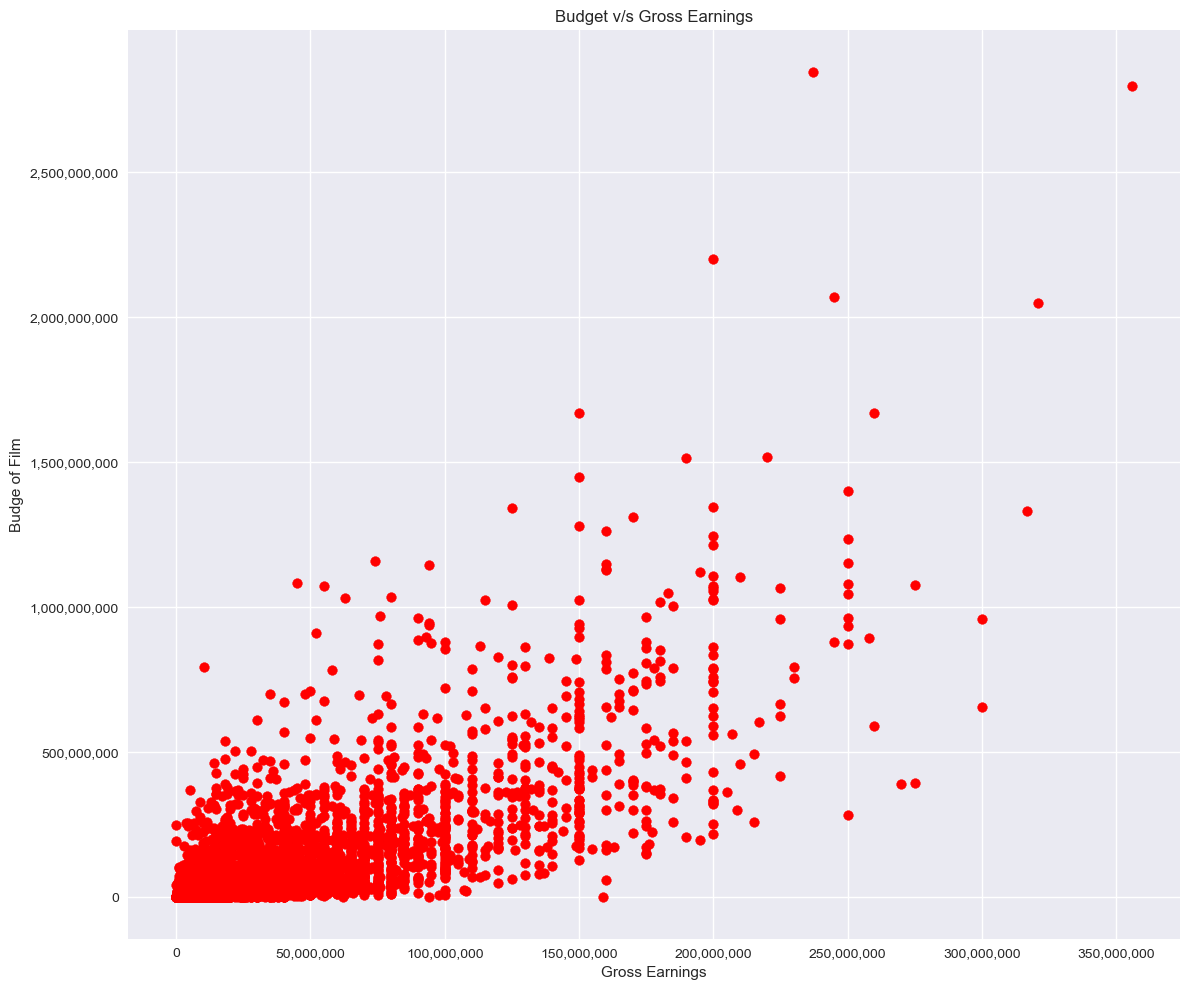

In [17]:
plt.figure(figsize=(12,10))

plt.scatter(x=movie_df["budget"],y=movie_df["gross"],c="red")

plt.title("Budget v/s Gross Earnings")

plt.xlabel("Gross Earnings")
plt.ylabel("Budge of Film")

## Changing the xtick label to show value in 1000s instead of scientific notation
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

## Changing the ytick label to show value in 1000s instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.tight_layout()

plt.show()

In [18]:
movie_df.sort_values("budget",ascending=False).head()

,name,rating,genre,year,year_corrected,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0


#### Regression plotting using seaborn for Budget v/s Gross

Since from the above Scatter plot we are unable to find the exact correlation, we will be using Seaborn Regression Plot to find the correlation

Text(0.5, 1.0, 'Budget v/s Gross')

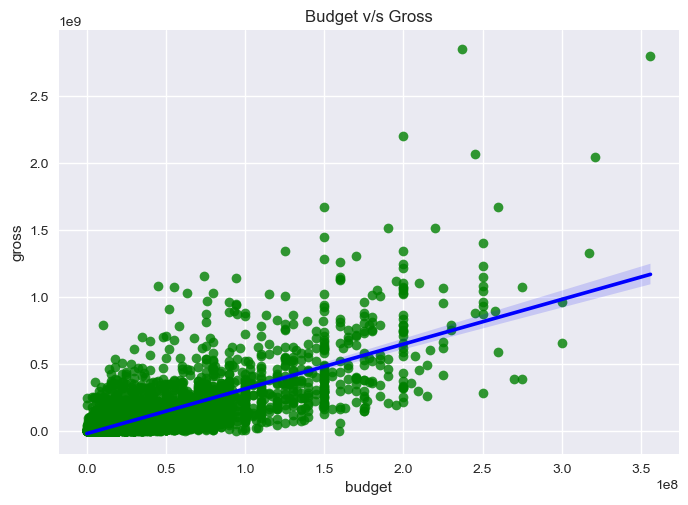

In [19]:
sns.regplot(data=movie_df,x="budget",y="gross",scatter_kws={"color":"green"},line_kws={"color":"blue"}).set_title("Budget v/s Gross")

Default correlation method for a dataframe is Pearson, there are 3 methods in total.
1. Pearson
2. Kendall
3. Spearman

In [20]:
movie_df.corr(numeric_only=True)

,year,year_corrected,score,votes,budget,gross,runtime
year,1.000000,0.998726,0.056386,0.206021,0.327722,0.274321,0.075077
year_corrected,0.998726,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.056386,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


We see a high correlation between Budget & Gross.
i.e., As budget increases Gross increases and vice versa

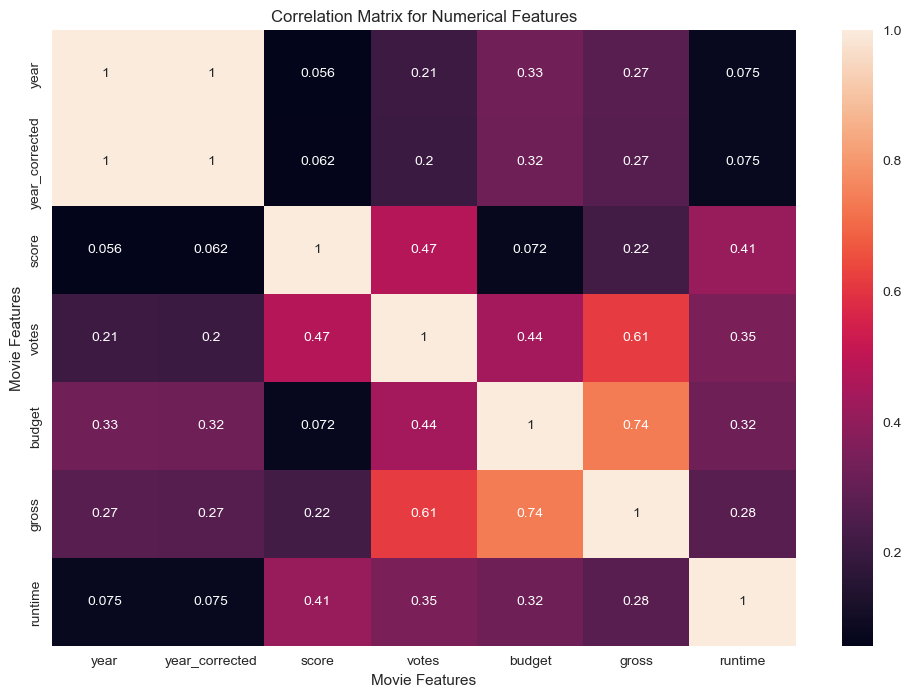

In [24]:
correlation_matrix = movie_df.corr(numeric_only=True)

plt.figure(figsize=(12,8))

sns.heatmap(data=correlation_matrix,annot=True)

plt.title("Correlation Matrix for Numerical Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

#### 2. Company Correlation

Since correlation can be performed only on Numeric values, we need to convert the Compnay column and others to numeric codes.

To achieve this, we will be converting all the object data type columns to category data type

By converting it to category, we can get a unique numeric code for each unique value

Categorical data is a type of data that represents categories or labels rather than numerical values.

In simple words, it is a way of classifying into distinct categories, such as genders, country names, or education levels.

Categorical data is handy when we have data that naturally fit into predefined options.

categories - returns the unique categories present in the categorical variable

codes - returns the integer codes representing the categories for each element in the categorical variable

In [92]:
df_numerized = movie_df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,year_corrected,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [85]:
movie_df.head()

,name,rating,genre,year,year_corrected,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


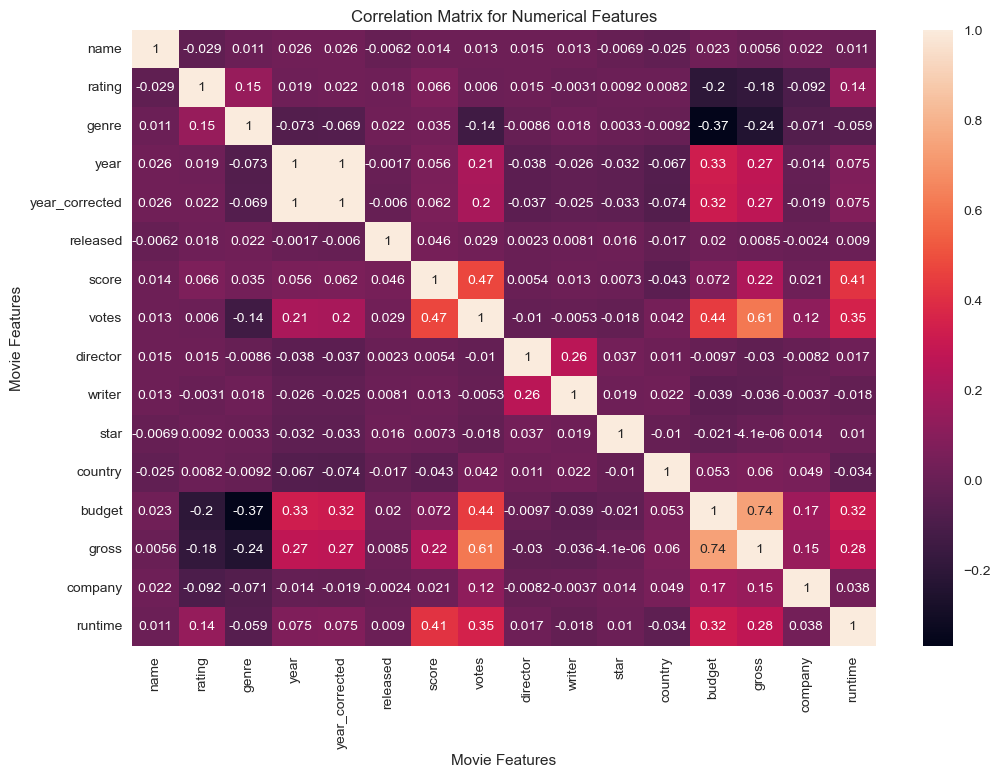

In [86]:
correlation_matrix = df_numerized.corr(numeric_only=True)

plt.figure(figsize=(12,8))

sns.heatmap(data=correlation_matrix,annot=True)

plt.title("Correlation Matrix for Numerical Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [87]:
correlated_mat = correlation_matrix.corr()

corr_pairs = correlated_mat.unstack()

corr_pairs

name            name              1.000000
                rating           -0.126713
                genre            -0.011978
                year             -0.078042
                year_corrected   -0.077133
                released         -0.097509
                score            -0.125354
                votes            -0.153357
                director         -0.057079
                writer           -0.059076
                star             -0.089699
                country          -0.125787
                budget           -0.090785
                gross            -0.125080
                company          -0.047628
                runtime          -0.140345
rating          name             -0.126713
                rating            1.000000
                genre             0.344405
                year             -0.153577
                year_corrected   -0.148297
                released         -0.028945
                score            -0.001171
           

In [89]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre           budget           -0.751221
budget          genre            -0.751221
genre           gross            -0.661788
gross           genre            -0.661788
budget          rating           -0.518270
rating          budget           -0.518270
votes           genre            -0.512125
genre           votes            -0.512125
gross           rating           -0.501650
rating          gross            -0.501650
company         rating           -0.324780
rating          company          -0.324780
genre           runtime          -0.310464
runtime         genre            -0.310464
year            genre            -0.309797
genre           year             -0.309797
                year_corrected   -0.303509
year_corrected  genre            -0.303509
gross           writer           -0.281334
writer          gross            -0.281334
votes           writer           -0.272875
writer          votes            -0.272875
rating          votes            -0.271368
votes      

In [90]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes           runtime           0.586194
runtime         votes             0.586194
votes           score             0.637193
score           votes             0.637193
runtime         score             0.639727
score           runtime           0.639727
budget          votes             0.709994
votes           budget            0.709994
gross           votes             0.837876
votes           gross             0.837876
budget          gross             0.940175
gross           budget            0.940175
year_corrected  year              0.999939
year            year_corrected    0.999939
name            name              1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released   

#### Final review - Votes and budget have the highest correlation to gross earnings
#### Company has low correlation